# Shipment Pricing Prediction


### 1) Problem Statement
*  The market for supply chain analytics is expected to develop at a CAGR of 17.3 percent 
from 2019 to 2024, more than doubling in size. This data demonstrates how supply 
chain organizations are understanding the advantages of being able to predict what will 
happen in the future with a decent degree of certainty. Supply chain leaders may use 
this data to address supply chain difficulties, cut costs, and enhance service levels all at 
the same time.
* The main goal is to predict the supply chain shipment pricing based on the available 
factors in the dataset.



### 2) Data Set
* Dataset - https://www.kaggle.com/divyeshardeshana/supply-chain-shipment-pricing-data
* The Data consists of 33 columns and 10324 rows

### 3 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data\SCMS_Delivery_History_Dataset.csv")

In [3]:
df.head(3)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,C?e d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,C?e d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.0,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN


In [4]:
df.shape

(10324, 33)

#### 4) Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

4.1 Check Missing values

In [5]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [6]:
# Filtering the only columns with Null value
nan_counts=df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
columns_with_nan

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64

There are no missing values in the above columns

4.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

4.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

4.4 Checking the number of unique values of each column


In [9]:
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

* We can drop PQ # ,PO / SO # , ASN/DN # ,PQ First Sent to Client Date

4.5 Check statistics of data set

In [10]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


4.6 Check Numerical and categorical columns

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)']

We have 26 categorical features : ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)']


* some numerical variables categorized as categorical variables. example : Weight and Freight Cost

5 Data Cleaning and Preprocessing

In [12]:
## Replace nan value with mean
df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean(), inplace=True)

In [13]:
## Drop Null values
df.dropna(axis=0, inplace=True)

In [14]:
df.shape

(8279, 33)

In [15]:
# Clean 'Weight (Kilograms)', 'Freight Cost (USD)' columns
import re
columns_to_clean = ['Weight (Kilograms)', 'Freight Cost (USD)']


In [16]:
# Define regular expression patterns for valid numerical values
pattern = r'^[-+]?\d*\.?\d+$'

In [ ]:
# Iterate over the columns and clean the inconsistent values
for column in columns_to_clean:
    df[column] = df[column].apply(lambda x: re.sub(pattern, '', str(x)) if not re.match(pattern, str(x)) else x)

In [18]:
# Convert the columns back to numeric data type
df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')

In [19]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,240.117626
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,240.117626
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,240.117626
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504.0,5920.42,240.117626
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328.0,NaN,240.117626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,NaN,NaN,705.790000
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,C?e d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,NaN,NaN,161.710000
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,NaN,NaN,5284.040000
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392.0,NaN,134.030000


In [20]:
## fill based on ASN/DN
mean_value1 = df.groupby('ASN/DN #')['Weight (Kilograms)'].transform('mean')
df['Weight (Kilograms)'].fillna(mean_value1, inplace=True)
mean_value2 = df.groupby('ASN/DN #')['Freight Cost (USD)'].transform('mean')
df['Freight Cost (USD)'].fillna(mean_value2, inplace=True)


In [21]:
df[df['ASN/DN #'] == "ASN-242"]

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
13,64,107-RW-T01,Pre-PQ Process,SCMS-268,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,...,60,10000,99800.0,9.98,0.17,"Cipla, Goa, India",Yes,7416.0,64179.42,240.117626
140,1299,107-RW-T01,Pre-PQ Process,SCMS-268,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,...,30,71577,1087970.4,15.20,0.51,"Cipla, Goa, India",No,7416.0,64179.42,240.117626
141,1300,107-RW-T01,Pre-PQ Process,SCMS-268,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,...,60,5605,202340.5,36.10,0.60,"Cipla, Patalganga, India",No,7416.0,64179.42,240.117626


In [22]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                             0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [23]:
df_with_nulls = df[['Weight (Kilograms)', 'Freight Cost (USD)']].loc[
    df[['Weight (Kilograms)', 'Freight Cost (USD)']].isnull().any(axis=1)
]

In [24]:
df_with_nulls

,Weight (Kilograms),Freight Cost (USD)
6,328.0,NaN
9,643.0,NaN
10,643.0,NaN
15,NaN,NaN
21,2126.0,NaN
...,...,...
10190,NaN,NaN
10300,8221.0,NaN
10321,85128.0,NaN
10322,1392.0,NaN


In [25]:
df.dropna(axis=0, inplace=True)

Treated every missing value ,inconsistent value and dublicated value

In [26]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']

We have 24 categorical features : ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site', 'First Line Designation']


In [27]:
from dateutil.relativedelta import relativedelta
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])


In [28]:
df['DayToDeliver'] = df.apply(lambda row: relativedelta(row['Delivery Recorded Date'], row['Scheduled Delivery Date']).days, axis=1)

In [29]:
df[['Scheduled Delivery Date','Delivery Recorded Date','DayToDeliver']]

,Scheduled Delivery Date,Delivery Recorded Date,DayToDeliver
1,2006-11-14,2006-11-14,0
3,2006-09-01,2006-09-01,0
4,2006-08-11,2006-08-11,0
5,2006-09-28,2006-09-28,0
7,2006-11-24,2006-11-24,0
...,...,...,...
10316,2015-06-02,2015-05-22,-11
10317,2015-06-30,2015-06-29,-1
10318,2015-07-31,2015-07-20,-11
10319,2015-07-31,2015-07-20,-11


In [30]:
df['Year'] = df['Delivery Recorded Date'].dt.to_period('Y')
df['Year'].nunique()


10

In [31]:
df['Year'] = df['Year'].astype(object)

In [ ]:
date_cols = [
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date'
]

In [ ]:

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5
df['quarter'] = df['date'].dt.quarter
df['weekofyear'] = df['date'].dt.isocalendar().week
df['hour'] = df['date'].dt.hour
df['days_since'] = (pd.Timestamp.now() - df['date']).dt.days

KeyError: 'date_cols'

In [ ]:
.

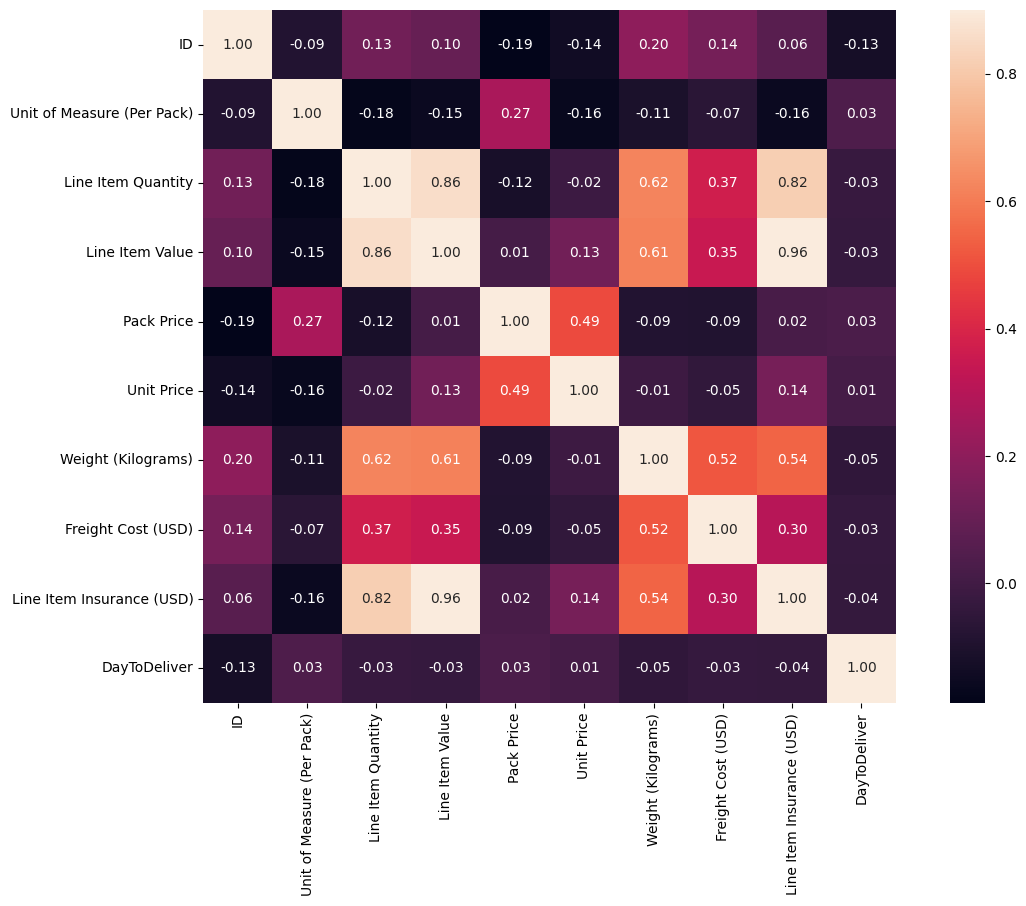

In [ ]:
# Assuming 'df' is your DataFrame with both numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

# Find the corelation using heatmap
numerical_df = df[numerical_columns]
correlation_metrics = numerical_df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, annot=True, fmt=".2f", vmax=0.9, square=True)
plt.show()


* drop ID ,Unit of measure(per pack),Daytodeliver and Unit Price because less colinearity
* drop Line item insurance ,Line item value ,'Line Item Quantity' to avoid multicolinearity

In [ ]:
# Drop unnecessary 
df = df.drop(['ID','Unit of Measure (Per Pack)','DayToDeliver','PQ #','PO / SO #','ASN/DN #','Project Code','Dosage','Dosage Form','Delivered to Client Date','Scheduled Delivery Date','Unit Price','Delivery Recorded Date','Item Description','PQ First Sent to Client Date','PO Sent to Vendor Date','Line Item Insurance (USD)','Line Item Value','Line Item Quantity'], axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

5.1 Visualize Outlier  to make some conclusion.
* Box Plot


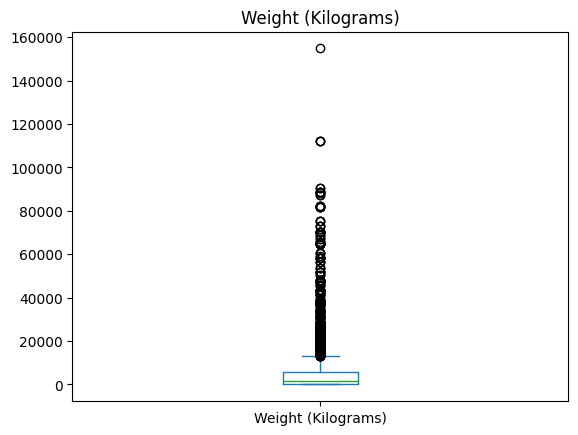

In [ ]:
df['Weight (Kilograms)'].plot(kind='box', title='Weight (Kilograms)')
plt.show()

* Treat Outlier

In [ ]:
# Define the winsorization limits
lower_limit = 0.10  # 1th percentile
upper_limit = 0.90  # 99th percentile

# Perform winsorization on the 'Weight' column
df['Weight (Kilograms)'] = np.clip(df['Weight (Kilograms)'], df['Weight (Kilograms)'].quantile(lower_limit), df['Weight (Kilograms)'].quantile(upper_limit))


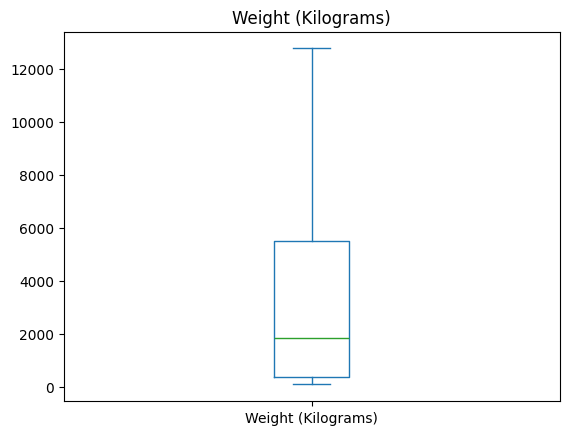

In [ ]:
df['Weight (Kilograms)'].plot(kind='box', title='Weight (Kilograms)')
plt.show()

In [ ]:
# Define the winsorization limits
lower_limit = 0.10  # 1th percentile
upper_limit = 0.90  # 99th percentile

# Perform winsorization on the 'Weight' column
df['Freight Cost (USD)'] = np.clip(df['Freight Cost (USD)'], df['Freight Cost (USD)'].quantile(lower_limit), df['Freight Cost (USD)'].quantile(upper_limit))


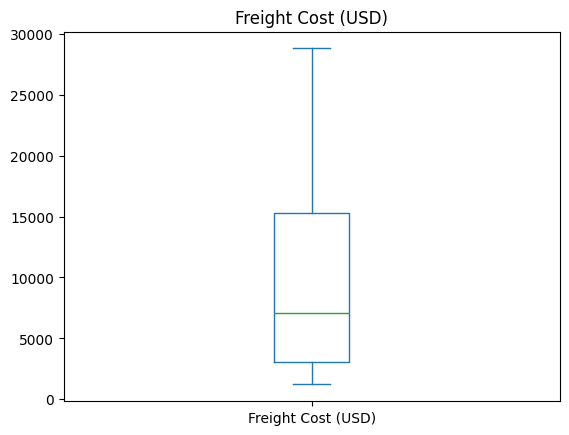

In [ ]:
df['Freight Cost (USD)'].plot(kind='box', title='Freight Cost (USD)')
plt.show()

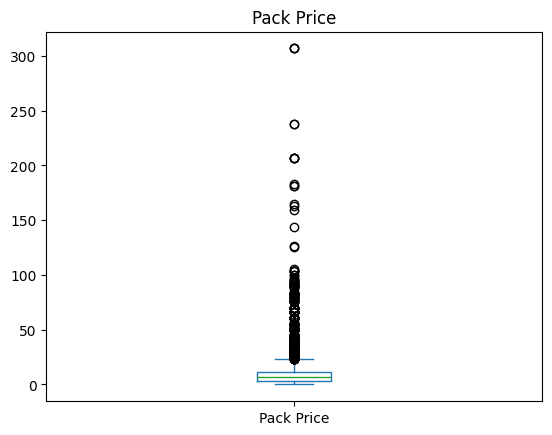

In [ ]:
df['Pack Price'].plot(kind='box', title='Pack Price')
plt.show()

In [ ]:
# Define the winsorization limits
lower_limit = 0.10  # 1th percentile
upper_limit = 0.90  # 99th percentile


# Perform winsorization on the 'Pack price' column
df['Pack Price']= np.clip(df['Pack Price'], df['Pack Price'].quantile(lower_limit), df['Pack Price'].quantile(upper_limit))



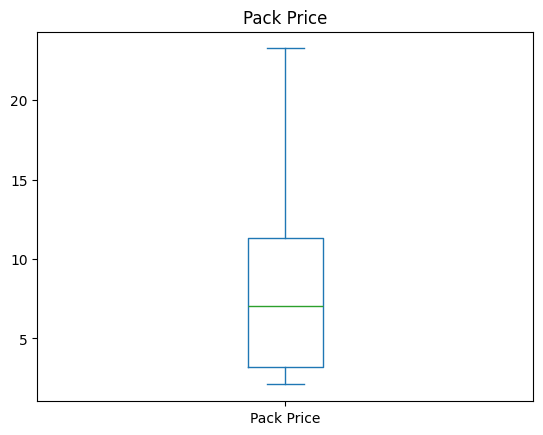

In [ ]:
df['Pack Price'].plot(kind='box', title='Pack Price')
plt.show()

In [ ]:
unique_counts = {}
for column in df.select_dtypes(include=['object']):
    unique_counts[column] = df[column].value_counts()

# Print the unique values and their counts
for column, values_counts in unique_counts.items():
    print("Column:", column)
    print(values_counts)
    print()
    

Column: Country
Country
Nigeria               814
C?e d'Ivoire          800
Uganda                704
Vietnam               643
Haiti                 512
Mozambique            492
Zimbabwe              459
Zambia                457
Tanzania              359
Rwanda                318
South Africa          288
Congo, DRC            222
Guyana                163
Ethiopia              124
Burundi                68
Cameroon               50
South Sudan            49
Ghana                  48
Dominican Republic     32
Namibia                30
Swaziland              21
Guatemala              10
Benin                  10
Libya                   8
Malawi                  4
Angola                  3
Afghanistan             3
Botswana                3
Togo                    2
Senegal                 1
Kenya                   1
Name: count, dtype: int64

Column: Managed By
Managed By
PMO - US    6698
Name: count, dtype: int64

Column: Fulfill Via
Fulfill Via
From RDC       4645
Direct Drop    20

In [ ]:
# Drop some columns
df=df.drop(['Managed By','Product Group','Brand','Molecule/Test Type','Manufacturing Site'],axis=1)


In [ ]:
X = df.drop('Freight Cost (USD)',axis=1)
y=df['Freight Cost (USD)']

In [ ]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [ ]:
num_features

Index(['Pack Price', 'Weight (Kilograms)'], dtype='object')

In [ ]:
cat_features

Index(['Country', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'Sub Classification', 'Vendor', 'First Line Designation', 'Year'],
      dtype='object')

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5358, 96), (1340, 96))

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6057.2346
- Mean Absolute Error: 4622.4553
- R2 Score: 0.5413
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6095.2122
- Mean Absolute Error: 4668.6241
- R2 Score: 0.5253


Lasso
Model performance for Training set
- Root Mean Squared Error: 6061.2909
- Mean Absolute Error: 4630.3259
- R2 Score: 0.5407
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6094.7291
- Mean Absolute Error: 4673.9565
- R2 Score: 0.5254


Ridge
Model performance for Training set
- Root Mean Squared Error: 6058.8246
- Mean Absolute Error: 4626.8288
- R2 Score: 0.5411
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6092.3510
- Mean Absolute Error: 4668.2416
- R2 Score: 0.5258


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4325.7598
- Mean Absolute Error: 2913.7413


In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
5,Random Forest Regressor,0.805718
6,XGBRegressor,0.795091
7,CatBoosting Regressor,0.794266
3,K-Neighbors Regressor,0.653498
4,Decision Tree,0.646557
2,Ridge,0.525764
1,Lasso,0.525393
0,Linear Regression,0.525318
8,AdaBoost Regressor,0.511650


Random Forest Regressor Performing well with 80.20%

In [ ]:
import csv
# # Specify the file path and open the CSV file in write mode
# csv_file_path = 'cleaned.csv'
# csv_file = open(csv_file_path, 'w', newline='')
# # Create a CSV writer object
# csv_writer = csv.writer(csv_file)

# # Write the cleaned data to the CSV file
# csv_writer.writerows(df)

# # Close the CSV file
# csv_file.close()

In [ ]:
# df=df.drop('Year', axis=1)

In [ ]:
csv_file_path = 'clean.csv'

df = pd.DataFrame(df)
df.to_csv(csv_file_path, index=False, header=True)
